# Features selection : 
**Feature Selection**

Feature selection is a method of selecting features from your feature set to be used for modeling. It draws from a set of existing features, so it's different than feature engineering because it doesn't create new features. The overarching goal of feature selection is to improve your model's performance. Perhaps your existing feature set is much too large, or some of the features you're working with are unnecessary. There are different ways you can perform feature selection. It's possible to do it in an automated way. Scikit-learn has several methods for automated feature selection, such as choosing a variance threshold and using univariate statistical tests

**Why reduce dimensionality?**

Your dataset will become simpler and thus easier to work with, require less disk space to store and computations will run faster. In addition, models are less likely to overfit on a dataset with fewer dimensions.

**Selection vs extraction**

When we apply feature selection, we completely remove a feature and the information it holds from the dataset. We try to minimize the information loss by only removing features that are irrelevant or hold little unique information, but this is not always possible.

Compared to feature selection, feature extraction is a completely different approach but with the same goal of reducing dimensionality. Instead of selecting a subset of features from our initial dataset, we'll be calculating, or extracting, new features from the original ones. These new features have as little redundant information in them as possible and are therefore fewer in number. One downside is that the newly created features are often less intuitive to understand than the original ones. 
PCA Calculating 

**Principal Components**


## 1-Feature selection: 

 Feature selection is the process of reducing the number of input variables when developing a predictive model.
It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

We can summarize feature selection as follows.

    Feature Selection: Select a subset of input features from the dataset.
    
       - Unsupervised: Do not use the target variable (e.g. remove redundant variables).
            Correlation
            
       - Supervised: Use the target variable (e.g. remove irrelevant variables).
            Wrapper: Search for well-performing subsets of features.
                RFE
                
            Filter: Select subsets of features based on their relationship with the target.
                Statistical Methods
                Feature Importance Methods
                
       - Intrinsic: Algorithms that perform automatic feature selection during training.
                Decision Trees
                
                
       - Dimensionality Reduction: Project input data into a lower-dimensional feature space.
       
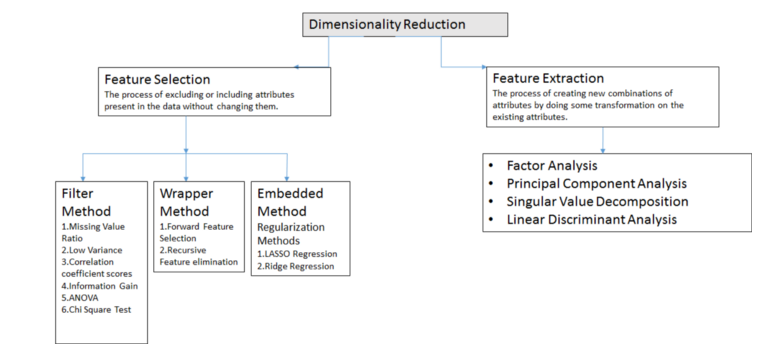

# Step 1: Import helpful libraries

In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
# Preparation  
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
# Import StandardScaler from scikit-learn

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer,IterativeImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline,FeatureUnion
from sklearn.manifold import TSNE
# Import train_test_split()
# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import make_scorer,mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve,confusion_matrix
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.linear_model import LogisticRegression

#import tensorflow as tf 
#from tensorflow.keras import layers
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.callbacks import LearningRateScheduler
#import smogn
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif,chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
import lightgbm as lgbm
#from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier,XGBRegressor
from sklearn import set_config
from itertools import combinations
# Cluster :
from sklearn.cluster import MiniBatchKMeans
#from yellowbrick.cluster import KElbowVisualizer
#import smong 
import category_encoders as ce
import warnings
#import optuna 
from joblib import Parallel, delayed
import joblib 
from sklearn import set_config
from typing import List, Optional, Union
set_config(display='diagram')
warnings.filterwarnings('ignore')


# Load the data

In [2]:
%%time 
train = pd.read_csv('../input/GiveMeSomeCredit/cs-training.csv')
test = pd.read_csv('../input/GiveMeSomeCredit/cs-test.csv')
train.head(3)

CPU times: user 194 ms, sys: 70.3 ms, total: 264 ms
Wall time: 394 ms


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


# Convert Dtypes :

In [3]:
# Convert Dtypes :
train[train.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns] = train[train.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object','category']).columns] = train.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))
# Convert Dtypes :
test[test.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns] = test[test.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns].apply(pd.to_numeric)
test[test.select_dtypes(['object','category']).columns] = test.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))

# Reduce Memory

In [4]:
# Author : https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        name =df[col].dtype.name 
        
        if col_type != object and col_type.name != 'category':
        #if name != "category":    
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
train= reduce_mem_usage(train)
test= reduce_mem_usage(test)

Memory usage of dataframe is 13.73 MB
Memory usage after optimization is: 3.29 MB
Decreased by 76.0%
Memory usage of dataframe is 9.29 MB
Memory usage after optimization is: 2.90 MB
Decreased by 68.7%


# X and Y

In [5]:
# Cardinality : 
# - RevolvingUtilizationOfUnsecuredLines :125728, high Outlier
# - DebtRatio :114194 , high Outlier 
# deal with outlier + bin 
PERCENTAGE = ["RevolvingUtilizationOfUnsecuredLines", "DebtRatio"]
# MonthlyIncome:13594 , high outlier +bin 
REAL= ["MonthlyIncome"]
# Can be considred as cat 
NUMERIC_DISCRET_low = ["NumberOfDependents",
                       "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberRealEstateLoansOrLines",
                       "NumberOfTimes90DaysLate",
                       "NumberOfOpenCreditLinesAndLoans",
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "age"]
Late_Pay_Cols = ['NumberOfTime30-59DaysPastDueNotWorse',
                 'NumberOfTimes90DaysLate',
                 'NumberOfTime60-89DaysPastDueNotWorse']
TARGET = ["SeriousDlqin2yrs"]

#also change the type for TARGET to categorical
#df[TARGET] = df[TARGET].astype('category')

In [6]:
y = train['SeriousDlqin2yrs']

# Imput before Descritaziation : 

## IterativeImputer


In [7]:
%%time 
param =  {   "verbosity": 0,
            #"objective": "binary:logistic",
            #"eval_metric": "auc",
            'random_state': 42,
            # regression
            'objective':'reg:squarederror', 
             'eval_metric': 'mae',
            #early_stopping_rounds=100 ,
            #'gpu_id':0, 
            #'predictor':"gpu_predictor",
            # use exact for small dataset.
            #"tree_method": "exact",
            # big data :
            # 'tree_method': 'gpu_hist',
            # defines booster, gblinear for linear functions.
             'booster': 'gbtree', 
            'lambda': 8.544792472633987e-07,
            'alpha': 0.31141671752487043,
            'subsample': 0.8779467596981366, 
            'colsample_bytree': 0.9759532762677546,
            'learning_rate': 0.008686087328805853, 
            'n_estimators': 6988,
            'max_depth': 9,
            'min_child_weight': 2, 
            'eta': 3.7603213457541647e-06,
            'gamma': 2.1478058456847449e-07,
            'grow_policy': 'lossguide'}
                

#model_xgb = XGBRegressor(
       #objective="mae",
 #   **xgb_params2)

numeric_transformer1 = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                           # ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
numeric_transformer2 = Pipeline(
                            steps=[
                            #('imputer', SimpleImputer(strategy='median'
                             #                         ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                           # ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )

pipe_xgbr1 = Pipeline(
                    steps=[
                        ('preprocessor', numeric_transformer1),
                        ('classifier', XGBRegressor(
                      #objective="mae",
                       **param))
                    ]
                )
pipe_xgbr2 = Pipeline(
                    steps=[
                        ('preprocessor', numeric_transformer2),
                        ('classifier', XGBRegressor(
                      #objective="mae",
                       **param))
                    ]
                )

#imputer=IterativeImputer(estimator=XGBRegressor(
#                      #objective="mae",
 #                     **param),max_iter=2,
  #                       add_indicator=True,
   #                      random_state=42)
#train=train.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
#test=test.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
#imputer.fit(train)
#train = imputer.transform(train)
#test = imputer.transform(test)
#features=['RevolvingUtilizationOfUnsecuredLines', 'age',
#      'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
 #      'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
 #     'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
 #     'NumberOfDependents']
#train=pd.DataFrame(train,columns=features)
#test=pd.DataFrame(test,columns=features)
#train= reduce_mem_usage(train)
#test= reduce_mem_usage(test)

CPU times: user 505 µs, sys: 0 ns, total: 505 µs
Wall time: 514 µs


## Rgression Imputer 

In [8]:
%%time 
train=train.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
test=test.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
train_final= pd.concat( [train, test], axis=0) 
#testdf_income= train_final[train_final['MonthlyIncome'].isnull()==True]
traindf_income = train_final[train_final['MonthlyIncome'].isnull()==False]
y_income = traindf_income['MonthlyIncome']
X_income=traindf_income.drop(["MonthlyIncome"],axis=1)
pipe_xgbr1.fit(X_income, y_income)
train_income_missing=train[train['MonthlyIncome'].isnull()==True].drop(["MonthlyIncome"],axis=1)
test_income_missing=test[test['MonthlyIncome'].isnull()==True].drop(["MonthlyIncome"],axis=1)
train_predicted = pipe_xgbr1.predict(train_income_missing)
test_predicted = pipe_xgbr1.predict(test_income_missing)
train.loc[(train.MonthlyIncome.isnull()), 'MonthlyIncome'] = train_predicted
test.loc[(test.MonthlyIncome.isnull()), 'MonthlyIncome'] = test_predicted

CPU times: user 1h 14min 43s, sys: 6.88 s, total: 1h 14min 50s
Wall time: 19min 16s


In [9]:
%%time 
traindf_NumberOfDependents = train_final[train_final['NumberOfDependents'].isnull()==False]
y_NumberOfDependents = traindf_NumberOfDependents['NumberOfDependents']
X_NumberOfDependents=traindf_NumberOfDependents.drop(["NumberOfDependents"],axis=1)
pipe_xgbr2.fit(X_NumberOfDependents, y_NumberOfDependents)
train_NumberOfDependents_missing=train[train['NumberOfDependents'].isnull()==True].drop(["NumberOfDependents"],axis=1)
test_NumberOfDependents_missing=test[test['NumberOfDependents'].isnull()==True].drop(["NumberOfDependents"],axis=1)
train_predicted = pipe_xgbr2.predict(train_NumberOfDependents_missing)
test_predicted = pipe_xgbr2.predict(test_NumberOfDependents_missing)
train.loc[(train.NumberOfDependents.isnull()), 'NumberOfDependents'] = train_predicted
test.loc[(test.NumberOfDependents.isnull()), 'NumberOfDependents'] = test_predicted

CPU times: user 1h 30min 8s, sys: 6.17 s, total: 1h 30min 14s
Wall time: 23min 17s


# Features Engineer
## Add Bin 
It's always good to bin data when we have lot of outlier and skweness 

In [10]:
# Add bin data 
# initializing append_str
append_str = 'cat_'
# Append suffix / prefix to strings in list
num_features1=["RevolvingUtilizationOfUnsecuredLines", "DebtRatio","MonthlyIncome"]
num_features2=["NumberOfDependents",
                       "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberRealEstateLoansOrLines",
                       "NumberOfTimes90DaysLate",
                       "NumberOfOpenCreditLinesAndLoans",
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "age"]
cat_features1 = [append_str + sub for sub in num_features1]
cat_features2 = [append_str + sub for sub in num_features2]

# create the discretizer object with strategy quantile and 1000 bins
discretizer1 = KBinsDiscretizer(n_bins=40, encode='ordinal',strategy='quantile')
discretizer2 = KBinsDiscretizer(n_bins=4, encode='ordinal',strategy='quantile')

pipeline1 = Pipeline([
        ('imputer', SimpleImputer( strategy='median')),
        ('bin', discretizer1)
    ])
# fit the discretizer to the train set
pipeline1.fit(train.loc[:,num_features1])
# apply the discretisation
train_cat1 = pipeline1.transform(train.loc[:,num_features1])
test_cat1 = pipeline1.transform(test.loc[:,num_features1])
train_df1=pd.DataFrame(train_cat1,columns=cat_features1).astype('category')
test_df1=pd.DataFrame(test_cat1,columns=cat_features1).astype('category')
train_final1= pd.concat( [train.loc[:,num_features1], train_df1], axis=1) 
test_final1= pd.concat( [test.loc[:,num_features1], test_df1], axis=1) 

pipeline2 = Pipeline([
        ('imputer', SimpleImputer( strategy='median')),
        ('bin', discretizer2)
    ])
# fit the discretizer to the train set
pipeline2.fit(train.loc[:,num_features2])
# apply the discretisation
train_cat2 = pipeline2.transform(train.loc[:,num_features2])
test_cat2 = pipeline2.transform(test.loc[:,num_features2])
train_df2=pd.DataFrame(train_cat2,columns=cat_features2).astype('category')
test_df2=pd.DataFrame(test_cat2,columns=cat_features2).astype('category')
train_final2= pd.concat( [train.loc[:,num_features2], train_df2], axis=1) 
test_final2= pd.concat( [test.loc[:,num_features2], test_df2], axis=1) 
train_final= pd.concat( [train_final1, train_final2], axis=1) 
test_final= pd.concat( [test_final1, test_final2], axis=1) 

# Final X and y

In [11]:
# Pour le train test
target= "SeriousDlqin2yrs"
X = train_final# axis=1
X_test_final =test_final# axis=1

In [12]:
del train
del test 
del train_final
del test_final

## Extract final cat  and num Features 
**What should we do for each colmun**

Separate features by dtype:

Next we’ll separate the features in the dataframe by their datatype. There are a few different ways to achieve this. I’ve used the select_dtypes() function to obtain specific data types by passing in np.number to obtain the numeric data and exclude=['np.number'] to return the categorical data. Appending .columns to the end returns an Index list containing the column names. For the categorical features, we don’t want to include the target  column, so I’ve dropped that.
### Cat Features 

In [13]:
# select non-numeric columns
cat_columns = X.select_dtypes(exclude=['int64','int16','float16','float32','float64','int8']).columns
cat_columns

Index(['cat_RevolvingUtilizationOfUnsecuredLines', 'cat_DebtRatio',
       'cat_MonthlyIncome', 'cat_NumberOfDependents',
       'cat_NumberOfTime60-89DaysPastDueNotWorse',
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object')

**Num Features**



In [14]:
# select the float columns
num_columns = X.select_dtypes(include=['int64','int16','float16','float32','float64','int8']).columns
num_columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object')

In [15]:
class FeaturesEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X=X.copy()
        # Calculate some metrics across rows
        X["num_missing"]  = X.isnull().sum(axis=1)
        X["std_row"] = X.std(axis=1)
        X["sem_row"] = X.sem(axis=1)
        X["abs_sum_row"] = X.abs().sum(axis=1)
        X["mean_row"] = X.mean(axis=1)
        X["max_row"]= X.max(axis=1)
        X["min_row"]= X.min(axis=1)
        X['Weighted_Sum_PastDue'] = 2 * X['NumberOfTime30-59DaysPastDueNotWorse'] + 3 * X['NumberOfTime60-89DaysPastDueNotWorse'] + 6 * X['NumberOfTimes90DaysLate']
        X['90days_out_of_TotalPastDue'] = X['NumberOfTimes90DaysLate'] / (X['Weighted_Sum_PastDue'])
        X.loc[X['Weighted_Sum_PastDue']==0, '90days_out_of_TotalPastDue'] = 0
        X['RemainingLines'] = X['NumberOfOpenCreditLinesAndLoans'] - X['NumberRealEstateLoansOrLines']
        X['Loans_vs_Other_Lines'] = X['RemainingLines'] / (1 + X['NumberRealEstateLoansOrLines'])
        X['Debt_per_Real_Estate_Loan'] = X['DebtRatio'] / X['NumberRealEstateLoansOrLines']
        X.loc[X['NumberRealEstateLoansOrLines']==0, 'Debt_per_Real_Estate_Loan'] = 0
        X['Disposable_Income_per_person'] = (X['MonthlyIncome'] - X['DebtRatio']) / (X['NumberOfDependents'] + 1)
        X.loc[X['NumberOfDependents']==0, 'Disposable_Income_per_person'] = 0
        X['RemainingLines_per_person'] = X['RemainingLines'] / (X['NumberOfDependents'] + 1)
        X['NumberRE_X_DebtRatio_X_age'] = X['NumberRealEstateLoansOrLines'] * X['DebtRatio'] / X['age']
        X['RevolvingUtilization_per_age'] = X['RevolvingUtilizationOfUnsecuredLines'] / X['age']
        X[X==np.inf]=np.nan
        X=reduce_mem_usage(X)
        return X  

## Extracted features 


In [16]:
class MiniKmeansTransformerEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, num_clusters = 11, encoder=ce.woe.WOEEncoder()):
        self.num_clusters = num_clusters
        self.encoder= encoder
        if self.num_clusters > 0:
            self.kmeans = MiniBatchKMeans(n_clusters=self.num_clusters, random_state=0)
    
    def fit(self, X, y=None):
        if self.num_clusters > 0:
            self.kmeans.fit(X)
            preds=self.kmeans.predict(X)
            preds=pd.DataFrame(preds, columns=['kmeans']).astype('category')
            self.encoder.fit(preds,y)
        return self
    
    def transform(self, X, y=None):
        pred_classes = self.kmeans.predict(X)
        pred_classes=pd.DataFrame(pred_classes, columns=['kmeans']).astype('category')
        pred_encoded = self.encoder.transform(pred_classes)
        return np.hstack((X, pred_encoded))
        #return pred_encoded

In [17]:
class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)
            
        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])
            
        spi = self._create_sparse_interactions(X)
        return spi
    
    
    def get_feature_names(self):
        return self.feature_names
    
    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()
        
        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)
                
                # get column multiplications value
                out = X[:, col_ixs[0]]    
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)
    


# Complete Pipe 

1. Features Engineer

1. Kmeans

1. Sparse

1. Poly

1. Scaler/Transformer

1. imput

In [18]:
# Cat pipeline
categorical_transformer = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent',
                                                  fill_value='missing',
                                                  add_indicator=True)),
                        ('encoder',  ce.woe.WOEEncoder()),#(Numerical Input, Categorical Output)
                        #('sparse_features', SparseInteractions(degree=2)),
                        #('reducedim',  SelectPercentile( mutual_info_classif, percentile=90))

                    ]
                    ) 
#Define vnum pipeline
numeric_transformer = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            #('general_features',FeaturesEngineer()),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('kmeans',MiniKmeansTransformerEncoder()),
                            ('polynominal_features', PolynomialFeatures(degree=2)),
                            #('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
# Features union cat + num 
# WOE+PowerTransformer
preprocessor_woe_powertransformer = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer, num_columns),
               # ('categorical', categorical_transformer, cat_columns)
            ])

# Pipe : add Features engineer/Features extractions PCA
I will not invest lot of time here as we don't have many features and  as we are not domain expert we can elimnate usefuel feautres .So this part can be redone more in depth in the future .
i will just quickly try pca and filter features .

In [19]:
preprocessor_woe_powertransformer

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median')),
                                                 ('scaler', PowerTransformer()),
                                                 ('kmeans',
                                                  MiniKmeansTransformerEncoder()),
                                                 ('polynominal_features',
                                                  PolynomialFeatures())]),
                                 Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object'))])

In [20]:
lgbm_param={'learning_rate': 0.0018069834369607075,
                             'max_depth': 8,
                             #'max_features': 4,
                             'min_samples_leaf': 47,
                             #'min_samples_split': 389,
                             'subsample': 0.8573598985000007,
                             #'n_iter_no_change': 300,
                             'n_estimators': 5000,
                            # 'verbose': 0,
                             'random_state': 42,
                             'metric': 'auc',
                            #"device_type" : "gpu",
                            'boosting_type': 'gbdt',
                           # 'tree_method': "gpu_hist"
                           }

pipe_lgbm_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
        #https://machinelearningmastery.com/feature-selection-with-numerical-input-data/
        ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=1)),
        ('classifier',
         lgbm.LGBMClassifier( 
            n_jobs=-1,
                                           verbose=-1,
                                           **lgbm_param))
    ]
)
pipe_lgbm_woe_powertransformer

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('kmeans',
                                                                   MiniKmeansTransformerEncoder()),
                                                                  ('polynominal_features',
                                                                   PolynomialFeatures())]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome'...
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object'))])),
                ('reducedim', SelectPercentile(percentile=95)),
                ('classifier',
                 LGBMClassifier(learning_rate=0.0018069834369607075,
                                max_depth=8, metric='auc', min_samples_leaf=47,
                                n_estimators=5000, random_state=42,
                                subsample=0.8573598985000007, verbose=-1))])

# Test Pipes with CV 

In [21]:
def plot_roc(y,y_pred):
    from sklearn.metrics import auc
    fpr, tpr, thresholds = roc_curve(y_true=y, y_score=y_pred)
    auc = auc(fpr, tpr)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Model(area = {:.3f})'.format(auc))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
Fold 0 | AUC: 0.866285974540478
Fold 0 | AP: 0.40153176937358215


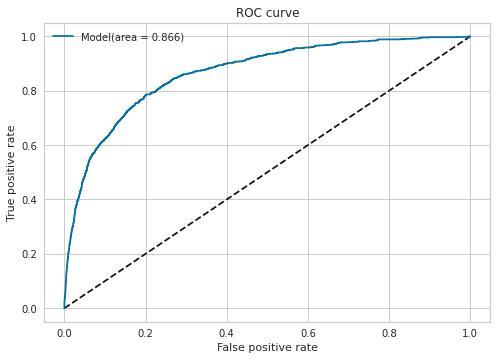

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
Fold 1 | AUC: 0.8609375132443635
Fold 1 | AP: 0.38271210643004555


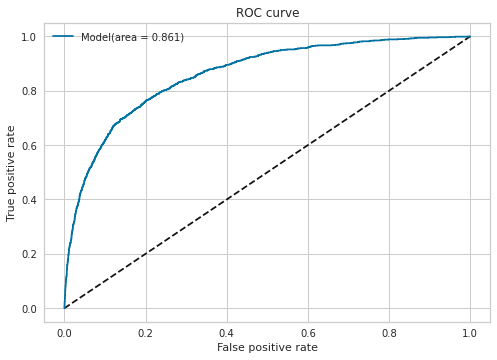

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
Fold 2 | AUC: 0.8660398030029366
Fold 2 | AP: 0.40260659529955894


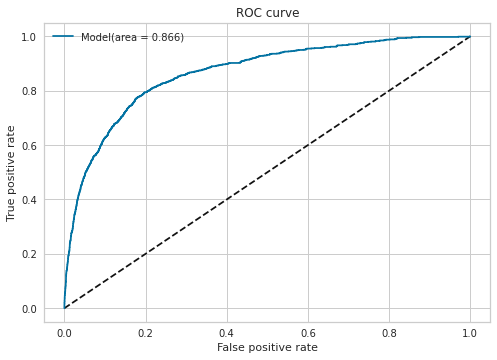

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
Fold 3 | AUC: 0.863946917552693
Fold 3 | AP: 0.3967393184748874


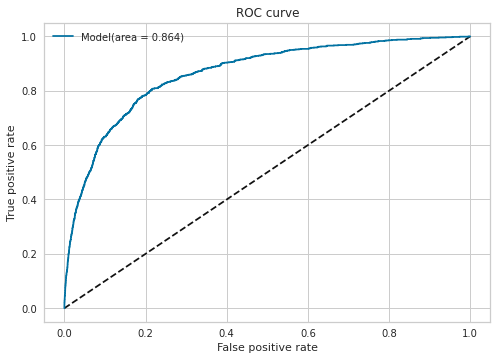

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
Fold 4 | AUC: 0.8657162398636769
Fold 4 | AP: 0.4015988489452065


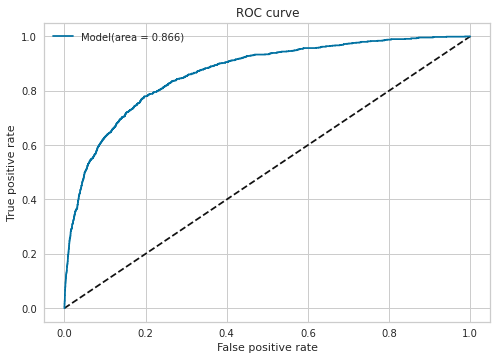

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
Fold 5 | AUC: 0.874196194014228
Fold 5 | AP: 0.44035609669675335


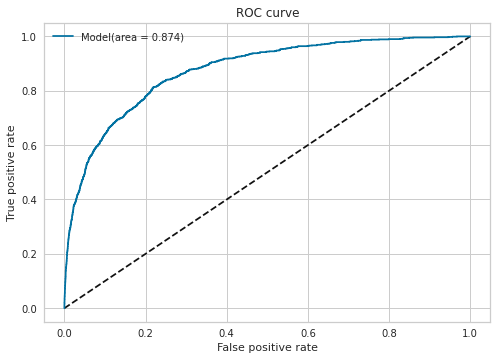

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
Fold 6 | AUC: 0.8589874116604624
Fold 6 | AP: 0.36463997205677456


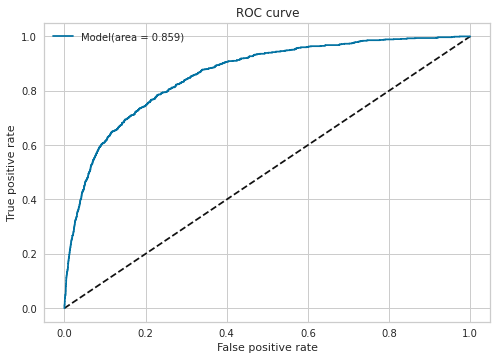

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
Fold 7 | AUC: 0.8590422740745114
Fold 7 | AP: 0.406825545484374


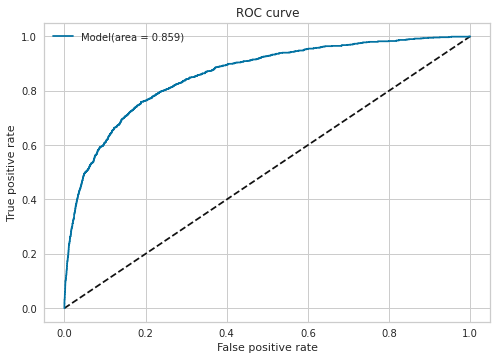

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
Fold 8 | AUC: 0.8739358687967685
Fold 8 | AP: 0.44231066779313616


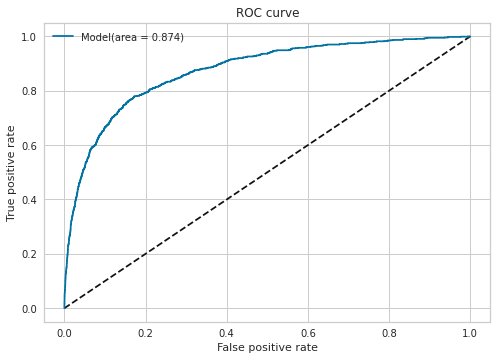

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
Fold 9 | AUC: 0.8638826789912103
Fold 9 | AP: 0.3724137507426916


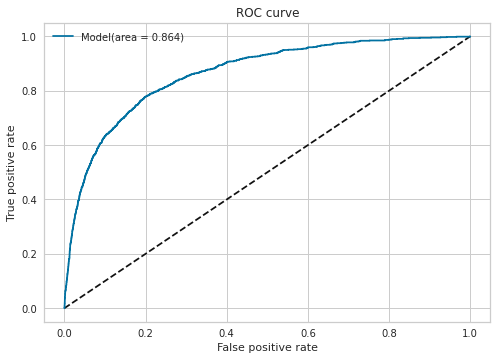


Overall mean auc : 0.8652970875741328

Overall mean mean average : 0.401173467129701
CPU times: user 1h 31min 42s, sys: 22.1 s, total: 1h 32min 4s
Wall time: 23min 57s


In [22]:
%%time 
# evaluate each strategy on the dataset
results = list()
# Setting a 10-fold stratified cross-validation (note: shuffle=True)
SEED = 42
FOLDS = 10
skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=SEED)
# CV interations
# Create arrays for the features and the response variable
roc_auc = list()
average_precision = list()
#X1=X.iloc[0:2000,:].copy()
#y1=y[0:2000].copy()
oof = np.empty((X.shape[0],))
#oof_bin = np.empty((X.shape[0],))
predictions=[]
mean_auc = 0
mean_ap=0
best_iteration = list()
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):    
    X_train, y_train = X.iloc[list(train_idx), :], y.iloc[list(train_idx)]
    X_test, y_test = X.iloc[list(test_idx), :],y.iloc[list(test_idx)]
    pipe_lgbm_woe_powertransformer.fit(X_train,y_train)
    preds = pipe_lgbm_woe_powertransformer.predict_proba(X_test)[:,1]
    oof[test_idx] = preds
    auc_score= roc_auc_score(y_true=y_test, y_score=preds)
    roc_auc.append(auc_score)
    print(f"Fold {fold} | AUC: {auc_score}")
    ap=average_precision_score(y_true=y_test, y_score=preds)
    average_precision.append(ap)
    print(f"Fold {fold} | AP: {ap}")
    plot_roc(y_test,preds)
    mean_auc += auc_score / FOLDS
    mean_ap+=ap/FOLDS
    predictions.append(pipe_lgbm_woe_powertransformer.predict_proba(X_test_final)[:,1]) 
    #Mean of the predictions
print(f"\nOverall mean auc : {mean_auc}")
print(f"\nOverall mean mean average : {mean_ap}")

In [23]:
#pipe_lgbm_woe_powertransformer.fit(X,y)
#predictions =pipe_lgbm_woe_powertransformer.predict_proba(X_test_final)[:,1]

In [24]:
predictions = np.mean(np.column_stack(predictions), axis=1)

In [25]:
# Save the predictions to a CSV file
sub = pd.read_csv('../input/GiveMeSomeCredit/sampleEntry.csv')
sub['Probability']=predictions
sub.to_csv('pipe_lgbm_woe_powertransformer_estimator_XGB_CV_cat_num_V5.csv', index=False)
sub

,Id,Probability
0,1,0.059357
1,2,0.043084
2,3,0.015515
3,4,0.064689
4,5,0.105483
...,...,...
101498,101499,0.030125
101499,101500,0.398874
101500,101501,0.010927
101501,101502,0.069618


# Conclusion : 

In features Selection we look for : 

- Features with missing values or little variance 

- list to drop [] less voted by algo after "Automatic Recursive Feature Elimination" FRE.

- Removing features with many missing values:[]

- Pairwise correlation & Removing highly correlated features:[]

- Manual Recursive Feature Elimination:[]

- "Golden" features, accordingly to Boruta-SHAP:

credit : 
https://machinelearningmastery.com/feature-selection-with-numerical-input-data/

https://mlwhiz.com/blog/2019/08/07/feature_selection/

https://www.kaggle.com/bannourchaker/1-featuresengineer-selectionpart1?scriptVersionId=72851779

https://github.com/trainindata/deploying-machine-learning-models/blob/aaeb3e65d0a58ad583289aaa39b089f11d06a4eb/section-04-research-and-development/03-machine-learning-pipeline-feature-selection.ipynb

https://github.com/trainindata/deploying-machine-learning-models/blob/aaeb3e65d0a58ad583289aaa39b089f11d06a4eb/section-04-research-and-development/03-machine-learning-pipeline-feature-selection.ipynb

 Mutal information is used for non linear relation : 

https://www.kaggle.com/pranav2109/featureengineering-ensemble-xgbpipeline

https://www.kaggle.com/sgedela/30-days-of-ml-competition

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

https://mlwhiz.com/blog/2019/08/07/feature_selection/

Feature selection with Boruta-SHAP

https://www.kaggle.com/lucamassaron/tutorial-feature-selection-with-boruta-shap


https://github.com/trainindata/deploying-machine-learning-models/blob/aaeb3e65d0a58ad583289aaa39b089f11d06a4eb/section-04-research-and-development/03-machine-learning-pipeline-feature-selection.ipynb


https://sebastianraschka.com/faq/docs/feature_sele_categories.html

https://github.com/DeepSparkChaker/CRISPDM_ULTIME/blob/main/CRISPDM_3__Dimensionality-Reduction.ipynb

https://www.kaggle.com/bannourchaker/1-featuresengineer-selectionpart1?scriptVersionId=72906910


https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

https://www.kaggle.com/lucamassaron/tutorial-feature-selection-with-boruta-shap

https://www.kaggle.com/bannourchaker/crsipdm-guide-hbgt-speedcvparallelism-private/edit/run/74570349